In [2]:
from sklearn.datasets import make_blobs
X, cluster_assignments = make_blobs(n_samples=700, centers=4, cluster_std=0.60, random_state=0)

In [7]:
from KMeans import KMeans

In [8]:
kmeans = KMeans(k=4)
predicted_clusters, predicted_centroids = kmeans.fit(X)

Text(0, 0.5, 'y-axis')

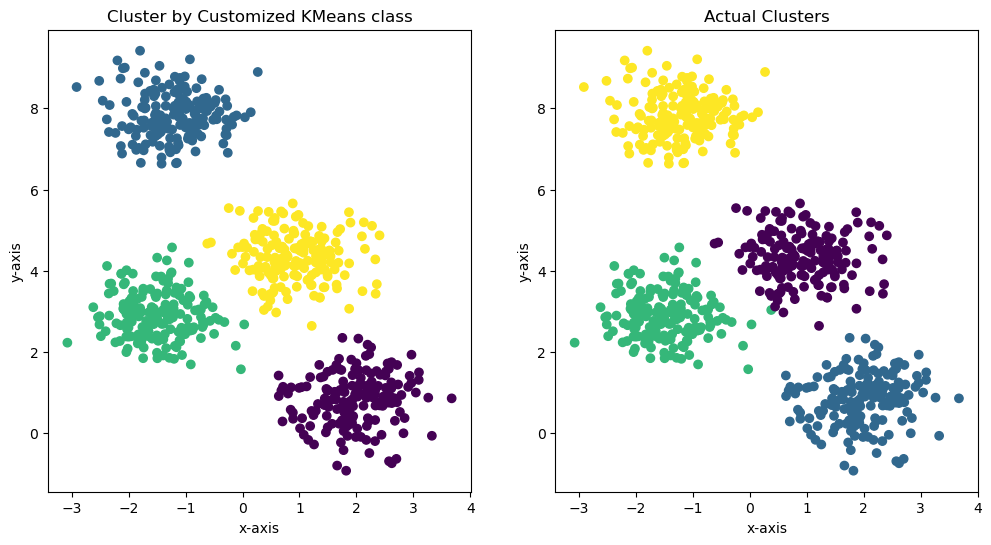

In [13]:
import matplotlib.pyplot as plt
# print(cluster_assignments)
# print(predicted_clusters)
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.scatter(X[:,0], X[:,1], c=predicted_clusters, cmap='viridis', marker='o')
plt.title('Cluster by Customized KMeans class')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.subplot(1, 2, 2)
plt.scatter(X[:,0], X[:,1], c=cluster_assignments, cmap='viridis', marker='o')
plt.title('Actual Clusters')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

/Users/shelger/miniconda3/envs/langchain/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, 'y-axis')

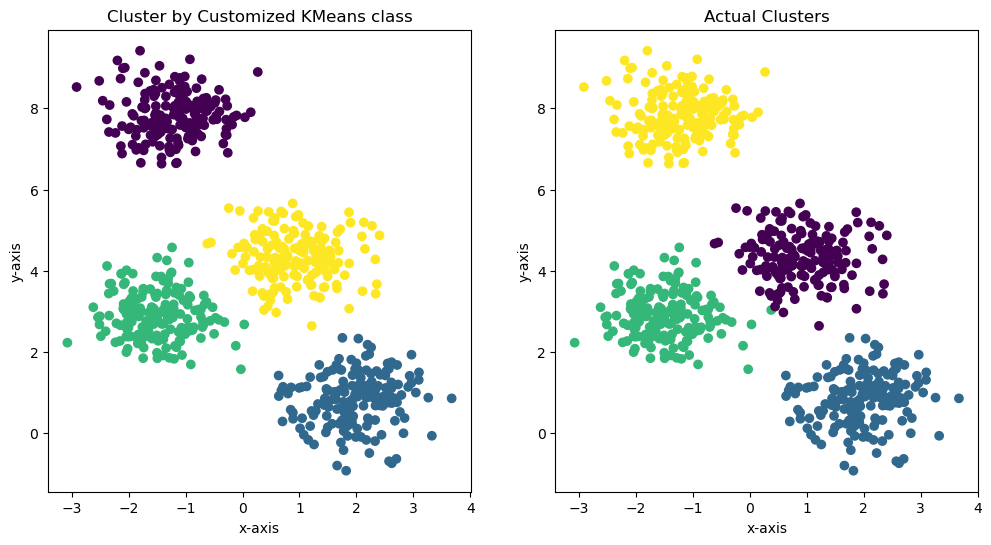

In [16]:
from sklearn.cluster import KMeans as SKLearnKMeans
sklearn_kmeans = SKLearnKMeans(n_clusters=4, random_state=0)
sklearn_kmeans.fit(X)
predicted_clusters_sklearn = sklearn_kmeans.labels_
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.scatter(X[:,0], X[:,1], c=predicted_clusters_sklearn, cmap='viridis', marker='o')
plt.title('Cluster by Customized KMeans class')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.subplot(1, 2, 2)
plt.scatter(X[:,0], X[:,1], c=cluster_assignments, cmap='viridis', marker='o')
plt.title('Actual Clusters')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

In [18]:
import pandas as pd
df = pd.read_csv('/Users/shelger/Downloads/Taxi_Trips__2013-2023_.csv')

In [23]:
pickup_columns = ['Pickup Centroid Latitude', 'Pickup Centroid Longitude']
dropoff_columns = ['Dropoff Centroid Latitude', 'Dropoff Centroid Longitude']
# remove NaN rows
pickup_data = df[pickup_columns].dropna()
dropoff_data = df[dropoff_columns].dropna()
print(pickup_data.head())
print(dropoff_data.head())

   Pickup Centroid Latitude  Pickup Centroid Longitude
0                 41.980264                 -87.913625
1                 41.878866                 -87.625192
2                 41.899602                 -87.633308
3                 41.979071                 -87.903040
4                 41.980264                 -87.913625
   Dropoff Centroid Latitude  Dropoff Centroid Longitude
1                  41.922686                  -87.649489
2                  41.901207                  -87.676356
5                  41.944227                  -87.655998
6                  41.946511                  -87.806020
8                  41.922686                  -87.649489


In [24]:
pickup_data.info()
dropoff_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95657 entries, 0 to 101786
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Pickup Centroid Latitude   95657 non-null  float64
 1   Pickup Centroid Longitude  95657 non-null  float64
dtypes: float64(2)
memory usage: 2.2 MB
<class 'pandas.core.frame.DataFrame'>
Index: 92489 entries, 1 to 101786
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Dropoff Centroid Latitude   92489 non-null  float64
 1   Dropoff Centroid Longitude  92489 non-null  float64
dtypes: float64(2)
memory usage: 2.1 MB


In [26]:
pickup_data.describe()

,Pickup Centroid Latitude,Pickup Centroid Longitude
count,95657.000000,95657.000000
mean,41.898703,-87.689956
std,0.064621,0.104274
min,41.660136,-87.913625
25%,41.878866,-87.695013
50%,41.895033,-87.642649
75%,41.949829,-87.626211
max,42.015934,-87.534903


In [27]:
dropoff_data.describe()

,Dropoff Centroid Latitude,Dropoff Centroid Longitude
count,92489.000000,92489.000000
mean,41.892116,-87.657546
std,0.059306,0.063430
min,41.660136,-87.913625
25%,41.878866,-87.663518
50%,41.892508,-87.633308
75%,41.922686,-87.625192
max,42.021224,-87.534903


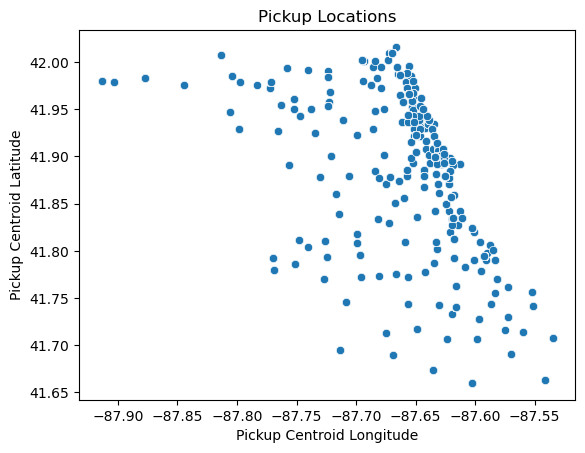

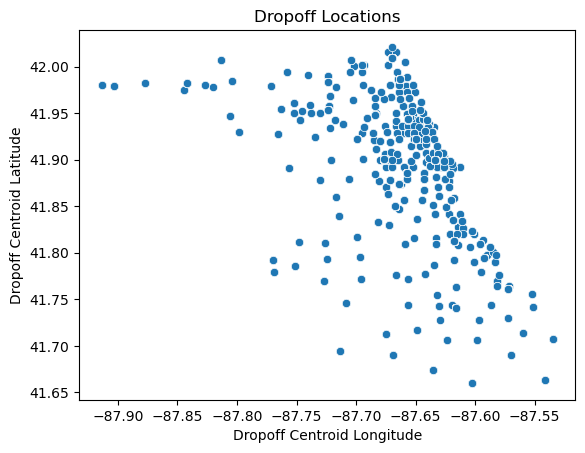

In [55]:
import seaborn as sns

sns.scatterplot(data=pickup_data, x='Pickup Centroid Longitude', y='Pickup Centroid Latitude')
plt.xlabel('Pickup Centroid Longitude')
plt.ylabel('Pickup Centroid Latitude')
plt.title('Pickup Locations')
plt.show()

sns.scatterplot(data=dropoff_data, x='Dropoff Centroid Longitude', y='Dropoff Centroid Latitude')
plt.xlabel('Dropoff Centroid Longitude')
plt.ylabel('Dropoff Centroid Latitude')
plt.title('Dropoff Locations')
plt.show()

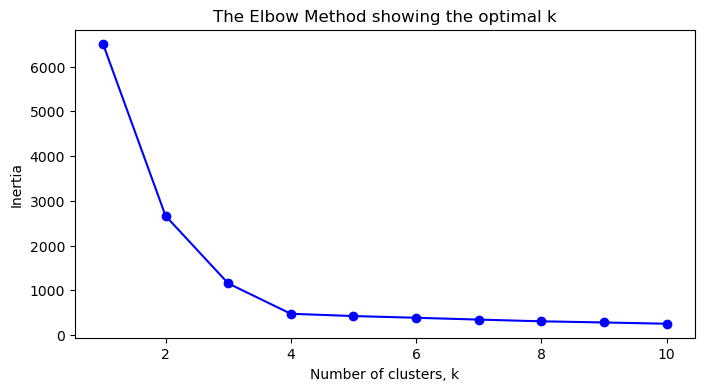

In [61]:
# I am using Elbow Method to determine the number of centroids
inertias = []
k_values = range(1, 11)
for k in k_values:
    kmeans = SKLearnKMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [62]:
# It seems 5 can be optimal number of centroids
sklearn_kmeans = SKLearnKMeans(n_clusters=5, random_state=42, n_init=10)
pickup_clusters = sklearn_kmeans.fit_predict(pickup_data)
dropoff_clusters = sklearn_kmeans.fit_predict(dropoff_data)

In [40]:
from sklearn.metrics import silhouette_score

pickup_score = silhouette_score(pickup_data, pickup_clusters)
dropoff_score = silhouette_score(dropoff_data, dropoff_clusters)
print('Silhouette Score of pickup: %.2f' % pickup_score)
print('Silhouette Score of dropoff: %.2f' % dropoff_score)

Silhouette Score of pickup: 0.70
Silhouette Score of dropoff: 0.61


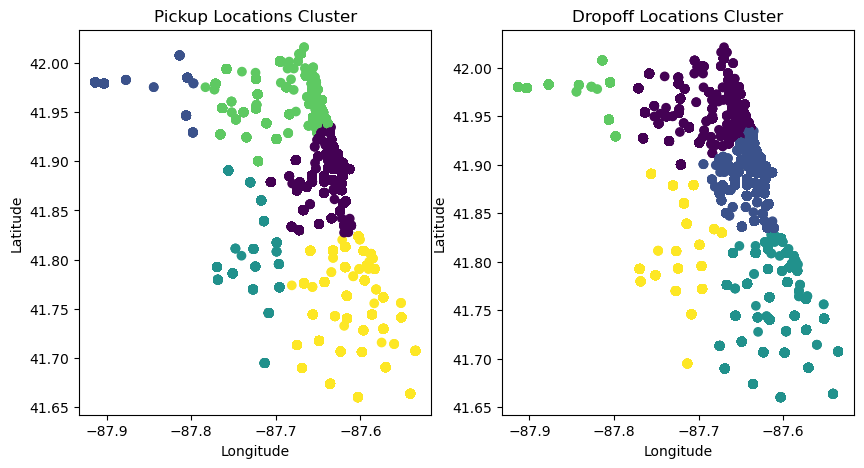

In [63]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(pickup_data['Pickup Centroid Longitude'], pickup_data['Pickup Centroid Latitude'], c=pickup_clusters, cmap='viridis', marker='o')
plt.title('Pickup Locations Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.subplot(1, 2, 2)
plt.scatter(dropoff_data['Dropoff Centroid Longitude'], dropoff_data['Dropoff Centroid Latitude'], c=dropoff_clusters, cmap='viridis', marker='o')
plt.title('Dropoff Locations Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

In [45]:
url = "https://cs.uef.fi/sipu/datasets/MopsiLocationsUntil2012-Finland.txt"
df = pd.read_csv(url, sep='\t', header=None, names=['x', 'y'])
print(df.head())

        x       y
0  625983  297439
1  626146  297440
2  626144  297456
3  626004  297394
4  626018  297437


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13467 entries, 0 to 13466
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       13467 non-null  int64
 1   y       13467 non-null  int64
dtypes: int64(2)
memory usage: 210.5 KB


<Axes: xlabel='x', ylabel='y'>

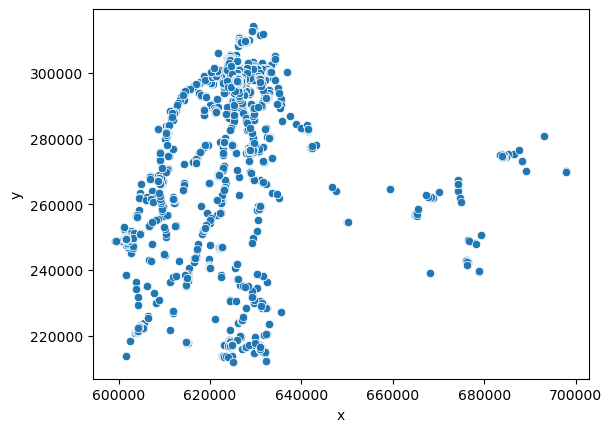

In [51]:
sns.scatterplot(data=df, x='x', y='y')

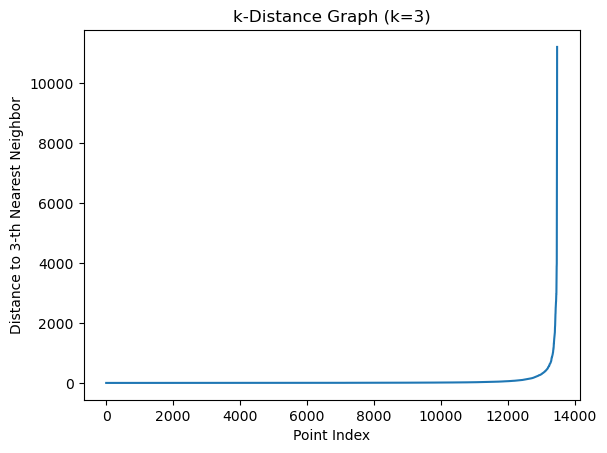

In [71]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
# Use elbow method to find eps
X = df[['x', 'y']].values
k = 3
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(X)
distances, indices = neigh.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:, k-1]
plt.plot(distances)
plt.xlabel('Point Index')
plt.ylabel(f'Distance to {k}-th Nearest Neighbor')
plt.title(f'k-Distance Graph (k={k})')
plt.show()

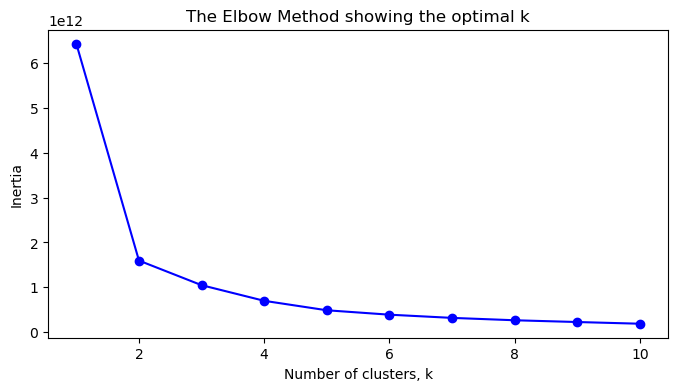

In [72]:
# The structure of this curve is not the one I need, so I decide to move on with Kmeans
inertias = []
k_values = range(1, 11)
for k in k_values:
    kmeans = SKLearnKMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [73]:
sklearn_kmeans = SKLearnKMeans(n_clusters=5, random_state=42, n_init=10)
route_clusters = sklearn_kmeans.fit_predict(df)
route_score = silhouette_score(df, route_clusters)
print('Silhouette Score: %.2f' % route_score)

Silhouette Score: 0.80


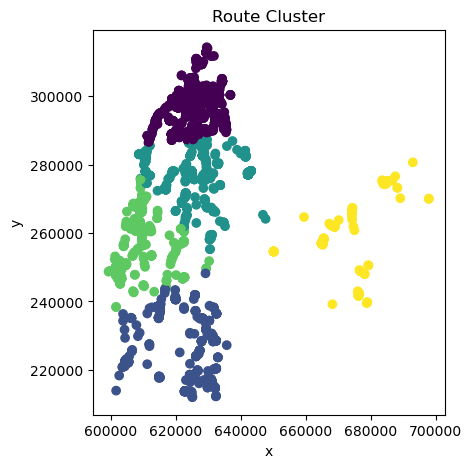

In [75]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(df['x'], df['y'], c=route_clusters, cmap='viridis', marker='o')
plt.title('Route Cluster')
plt.xlabel('x')
plt.ylabel('y')
plt.show()